In [ ]:
import sys
import numpy as np
import matplotlib

print("python:", sys.version)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)

python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy: 2.0.2
matplotlib: 3.10.0


Calculation involved in a single neuron

In [ ]:
inputs = [1, 2, 3] #[1.2, 5.2, 2.1]
weights = [0.2, 0.8 , -0.5]

bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


Calculation of 3 neuron with 4 inputs

In [ ]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

output = [
    inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1, #output of neuron1
    inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2, #output of neuron2
    inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3, #output of neuron3
]

print(output)

inputs = [1, 2, 3, 2.5]
weights=[
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

layer_output=[]

for neuron_weights, neuron_bias in zip(weights, biases):
  #print("Neuron Weights:",neuron_weights, "\nNeuron Bias:",neuron_bias)
      # Neuron Weights: [0.2, 0.8, -0.5, 1.0]
      # Neuron Bias: 2
      # Neuron Weights: [0.5, -0.91, 0.26, -0.5]
      # Neuron Bias: 3
      # Neuron Weights: [-0.26, -0.27, 0.17, 0.87]
      # Neuron Bias: 0.5
  neuron_output = 0
  for n_input, weight in zip(inputs, neuron_weights):
    """print("n_input:",n_input,"weight:",weight)
    n_input: 1 weight: 0.2
    n_input: 2 weight: 0.8
    n_input: 3 weight: -0.5
    n_input: 2.5 weight: 1.0
    n_input: 1 weight: 0.5
    n_input: 2 weight: -0.91
    n_input: 3 weight: 0.26
    n_input: 2.5 weight: -0.5
    n_input: 1 weight: -0.26
    n_input: 2 weight: -0.27
    n_input: 3 weight: 0.17
    n_input: 2.5 weight: 0.87"""
    neuron_output += n_input*weight
  neuron_output +=neuron_bias
  layer_output.append(neuron_output)

print(layer_output)


[4.8, 1.21, 2.385]
[4.8, 1.21, 2.385]


Using numpy, single neuron

In [ ]:
import numpy as np

inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot( weights , inputs) + bias

print(output)

4.8


Using Numpy, A neuron layer

In [ ]:
inputs = [1, 2, 3, 2.5]

print(np.shape(inputs))

weights=[
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

print(np.shape(weights))

biases = [2, 3, 0.5]

output = np.dot(weights,inputs) + biases

print(output)

(4,)
(3, 4)
[4.8   1.21  2.385]


multiple inputs and mutiple neurons (shape)

In [ ]:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]
]
print(np.shape(inputs))

weights=[
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

print(np.shape(weights))

biases = [2, 3, 0.5]

output = np.dot(inputs,np.array(weights).T) + biases #Transpose is performed to apply matrix multiplication

print(output)

(3, 4)
(3, 4)
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# Creating Neural Network with actual code

### Applying ReLU Activation Function

The Rectified Linear Unit (ReLU) is a widely used activation function in neural networks, primarily for hidden layers. It introduces non-linearity into the model, allowing it to learn more complex patterns than linear activation functions.

The formula for the ReLU function is simple:

$$\text{ReLU}(x) = \max(0, x)$$

Where:
- $x$ is the input value (output from the dense layer).

This means that if the input $x$ is positive, the output is $x$ itself. If the input is zero or negative, the output is zero. This simplicity makes ReLU computationally efficient and helps mitigate the vanishing gradient problem, which can occur with other activation functions like sigmoid or tanh.

The `Activation_ReLU` class implemented below applies this function to the output of a dense layer.

In [ ]:
import numpy as np

np.random.seed(0)

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) #reason for 0.10* is documented below
    self.biases = np.zeros((1,n_neurons)) #1st param: is shape itself thus (1,n_neurons) is given as the shape, since no. of bias = no. of neurons
    """
        print(np.random.randn(4,3))
        [[ 1.76405235  0.40015721  0.97873798]
        [ 2.2408932   1.86755799 -0.97727788]
        [ 0.95008842 -0.15135721 -0.10321885]
        [ 0.4105985   0.14404357  1.45427351]]

        Since the values are exceeding 1, we are taking it down around the range of -1 to 1
    """

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs) #(if x<=0 then 0, else x)

Layer1 = Layer_Dense(4,5)
Layer2 = Layer_Dense(5,2) #no of input should be equal to number of output from previous layer

Layer1.forward(X)
Layer2.forward(Layer1.output)
print("Output from Layer2:\n",Layer2.output)

Output = Activation_ReLU()
Output.forward(Layer2.output)
print("Output from Layer2 after activation function:\n",Output.output)



Output from Layer2:
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]
Output from Layer2 after activation function:
 [[0.148296   0.        ]
 [0.14100315 0.        ]
 [0.20124979 0.        ]]


Using nnfs package for dataset and same seed value along with computation in numpy (dot product)

In [ ]:
!pip install nnfs

In [ ]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

X ,y = spiral_data(100,3)  #100 feature-set of 3 classes, X is the data and y is the label

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = np.random.randn(n_inputs, n_neurons)
    self.bias = np.zeros((1,n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs,self.weights) + self.bias

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)

layer1 = Layer_Dense(2,5) #number of features = 2 since, there are x & y coords for the dataset
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print("Output of layer1:\n",layer1.output[:5])

layer2.forward(layer1.output)
print("Output of layer2:\n",layer2.output[:5])

layer2_output = Activation_ReLU()
layer2_output.forward(layer2.output)
print("Output of layer2 after activation function:\n",layer2_output.output[:5])

Output of layer1:
 [[ 0.          0.          0.          0.          0.        ]
 [-0.00835816 -0.00790404 -0.01334522  0.00465504  0.00045685]
 [-0.02399945  0.00059347 -0.02248083  0.00203573  0.00610024]
 [-0.0412122   0.04376721 -0.00953227 -0.01730223  0.0192649 ]
 [-0.05566051  0.05273885 -0.01720788 -0.02026777  0.02470861]]
Output of layer2:
 [[ 0.          0.        ]
 [ 0.01493582 -0.00587628]
 [ 0.01073066 -0.0296586 ]
 [-0.04059668 -0.07439873]
 [-0.04603062 -0.09698327]]
Output of layer2 after activation function:
 [[0.         0.        ]
 [0.01493582 0.        ]
 [0.01073066 0.        ]
 [0.         0.        ]
 [0.         0.        ]]


### Applying Softmax Activation Function

Softmax is an activation function often used in the output layer of a neural network for multi-class classification problems. It takes a vector of arbitrary real numbers and transforms them into a probability distribution, where the sum of the probabilities for each class is 1.

The formula for the Softmax function for a single output $j$ in a layer of $K$ outputs is:

$$\text{Softmax}(z_j) = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$$

Where:
- $z_j$ is the input value (output from the previous dense layer) for class $j$.
- $e$ is Euler's number (the base of the natural logarithm).
- $\sum_{k=1}^{K} e^{z_k}$ is the sum of the exponentials of all input values in the layer.

In practice, to prevent numerical instability from very large input values (leading to very large exponentials), a common optimization is to subtract the maximum value from all inputs before exponentiation:

$$\text{Softmax}(z_j) = \frac{e^{z_j - \max(z)}}{\sum_{k=1}^{K} e^{z_k - \max(z)}}$$

This normalization step ensures that the exponential values remain within a manageable range, preventing potential overflow issues without changing the resulting probability distribution. The `Activation_Softmax` class implemented below includes this optimization.

In [ ]:
nnfs.init()

layer_outputs = [[4.8,1.21,2.385],
                 [8.9,-1.81,0.3],
                 [1.41,1.051,0.026]]

exp_values = np.exp(layer_outputs)
print("exp values:\n",exp_values)
norm_values = exp_values / np.sum(exp_values,axis=1,keepdims=True) #performing normalization
#axis=None : sum of all individual values, axis=0: sum of all columns, axis=1: sum of all rows | keepdims : keep the dimension of input in the output

print("\nnorm values:\n",norm_values)
print("\nSum of all values:\n",np.sum(norm_values,axis=1,keepdims=True))

exp values:
 [[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.63654137e-01 1.34985881e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]

norm values:
 [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99793616e-01 2.23160054e-05 1.84067797e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]

Sum of all values:
 [[1.]
 [1.]
 [1.]]


In [ ]:
nnfs.init()
from nnfs.datasets import spiral_data
class Layer_Dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights = np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases

class Activation_ReLU:
  def forward(self,inputs):
    self.output = np.maximum(0,inputs)

class Activation_Softmax:
  def forward(self,inputs):
    exp_values  = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
    self.output = exp_values / np.sum(exp_values,axis=1,keepdims=True)

X, y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print("top 5 output:\n",activation2.output[:5])
print("\nmax of the output of 5 row-wise:\n",np.max(activation2.output,axis=1,keepdims=True)[:5])


top 5 output:
 [[0.33333334 0.33333334 0.33333334]
 [0.33173057 0.3318284  0.336441  ]
 [0.3288542  0.3291243  0.3420215 ]
 [0.32587105 0.32631534 0.34781358]
 [0.32318372 0.32378128 0.35303497]]

max of the output of 5 row-wise:
 [[0.33333334]
 [0.336441  ]
 [0.3420215 ]
 [0.34781358]
 [0.35303497]]


### Implementing Loss (Categorical Cross-Entropy)

Categorical Cross-Entropy is a common loss function used in classification tasks, particularly when there are multiple classes. It quantifies the difference between predicted probabilities (from the Softmax activation) and the true class labels.

The formula for Categorical Cross-Entropy for a single sample is:

$$L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$$

Where:
- $L$ is the loss.
- $C$ is the number of classes.
- $y_i$ is the true probability for class $i$ (usually 1 for the correct class and 0 for others in one-hot encoding).
- $\hat{y}_i$ is the predicted probability for class $i$ (output from the Softmax activation).

In the following code, we manually calculate this loss for a single example to illustrate the concept. For actual neural network training, we use optimized class implementations that handle batches of data.

In [ ]:
import math

softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0] #this is one hot encoding given target output index is [0] thus OHE -> [1,0,0]

loss_output = - (
    math.log(softmax_output[0])*target_output[0]
    + math.log(softmax_output[1])*target_output[1]
    + math.log(softmax_output[2])*target_output[2]
              )

print(loss_output)

0.35667494393873245


In [ ]:
from random import sample
nnfs.init()
from nnfs.datasets import spiral_data

class Layer_Dense:
  """Implements a dense neural network layer."""
  def __init__(self,n_inputs,n_neurons):
    self.weights = 0.1 * np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases

class Activation_ReLU:
  """Implements the Rectified Linear Unit (ReLU) activation function."""
  def forward(self,inputs):
    self.output = np.maximum(0,inputs)

class Activation_Softmax:
  """Implements the Softmax activation function, typically used for output layers in classification."""
  def forward(self,inputs):
    exp_values  = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
    self.output = exp_values / np.sum(exp_values,axis=1,keepdims=True)

class Loss:
  """Base class for loss functions."""
  def calculate(self,output,y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoreicalCrossEntropy(Loss):
  """Implements the Categorical Cross-Entropy loss function."""
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred,1e-7, 1-1e-7) #1e-7, 1-1e-7 so that log(0) is not encountered

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
      """
      [[0.7, 0.1, 0.2],    range(samples)->     [0,  y_true->  [0,         [0.7,  we are taking the range of y_true and thus mapping
      [0.1, 0.5, 0.4],                           1,   ,         1,     =    0.5,  each row's target value with the predicted value
      [0.02, 0.9, 0.08]]                         2]             1]          0.9]
      """
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
      """
      np.sum([[0.7, 0.1, 0.2], <- y_pred    y_true(OHE)-> [[1, 0, 0],               [0.7,      we are multiplying y_true(OHE) & y_pred_clipped thus
      [0.1, 0.5, 0.4],                    *               [0, 1, 0]           =      0.5,      only those features remain in y_pred_clipped which are 1(target_class)
      [0.02, 0.9, 0.08]]                                  [0, 1, 0]], axis=1)        0.9]      thus sum for each row become the y_pred value for that row
      """
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

X, y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(5,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
loss_func = Loss_CategoreicalCrossEntropy()
loss = loss_func.calculate(activation2.output,y)
print("\nLoss:",loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33334148 0.3333302  0.33332834]
 [0.33335316 0.33332598 0.33332086]
 [0.333332   0.33330762 0.3333604 ]
 [0.33333603 0.33330083 0.33336315]]

Loss: 1.0988972


In [ ]:
from random import sample
nnfs.init()
from nnfs.datasets import spiral_data

class Layer_Dense:
  """Implements a dense neural network layer."""
  def __init__(self,n_inputs,n_neurons):
    self.weights = 0.1 * np.random.randn(n_inputs,n_neurons)
    self.biases = np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output = np.dot(inputs,self.weights) + self.biases

class Activation_ReLU:
  """Implements the Rectified Linear Unit (ReLU) activation function."""
  def forward(self,inputs):
    self.output = np.maximum(0,inputs)

class Activation_Softmax:
  """Implements the Softmax activation function, typically used for output layers in classification."""
  def forward(self,inputs):
    exp_values  = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
    self.output = exp_values / np.sum(exp_values,axis=1,keepdims=True)

class Loss:
  """Base class for loss functions."""
  def calculate(self,output,y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoreicalCrossEntropy(Loss):
  """Implements the Categorical Cross-Entropy loss function."""
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred,1e-7, 1-1e-7) #1e-7, 1-1e-7 so that log(0) is not encountered

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]

    elif len(y_true.shape) == 2:
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

X, y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,6)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(6,4)
activation2 = Activation_ReLU()

dense3 = Layer_Dense(4,3)
activation3 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

print(activation3.output[:5])
loss_func = Loss_CategoreicalCrossEntropy()
loss = loss_func.calculate(activation2.output,y)
print("\nLoss:",loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333263 0.33333406 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.3333354  0.3333322  0.33333233]
 [0.33333594 0.33333176 0.33333233]]

Loss: 14.589445


## Results With Different Values and Layers
https://docs.google.com/spreadsheets/d/1bBG8H9Hab5VEZQZ6b2kp7RpDjoK8KjznwjO0ItosJMI/edit?usp=sharing

### Approximating Derivatives and Tangent Lines

This code demonstrates how to numerically approximate the derivative of a function and visualize its tangent line at a specific point. The function used for this example is $f(x) = 2x^2$.

**Steps involved:**
1.  **Define the function**: A Python function `f(x)` is defined to represent $2x^2$.
2.  **Generate data for plotting**: `x` values from 0 to 50 are created with a small step, and corresponding `y` values are calculated using `f(x)` to plot the original curve.
3.  **Choose a point for approximation**: An `x1` value (e.g., 2) is chosen to calculate the derivative and tangent line.
4.  **Calculate a second point**: A small `p2_delta` (e.g., 0.0001) is added to `x1` to get `x2`, creating a tiny interval for approximation.
5.  **Compute function values**: `y1 = f(x1)` and `y2 = f(x2)` are calculated.
6.  **Approximate the derivative**: The derivative is approximated as the slope of the line connecting `(x1, y1)` and `(x2, y2)` using the formula: $ \frac{\Delta y}{\Delta x} = \frac{y2 - y1}{x2 - x1} $.
7.  **Find the tangent line equation**: Using the point-slope form $y - y_1 = m(x - x_1)$, where $m$ is the approximate derivative, the intercept `b` for the tangent line ($y = mx + b$) is calculated.
8.  **Define tangent line function**: A function `approximate_tangent_line(x)` is created to easily get y-values for the tangent line.
9.  **Plotting**: The original function $f(x)$ and the approximated tangent line are plotted using `matplotlib` to visually confirm the approximation.

(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785


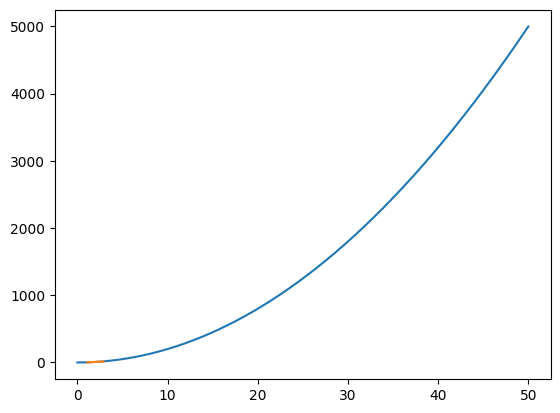

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 2*x**2

x = np.arange(0, 50, 0.001)
y = f(x)

plt.plot(x, y)

p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

print((x1,y1), (x2,y2))

approximate_derivate = (y2 - y1) / (x2 - x1)
b = y2 - approximate_derivate * x2

def approximate_tangent_line(x):
  return approximate_derivate*x + b

to_plot = [x1 - 0.9, x1, x1+0.9]
plt.plot(to_plot, [approximate_tangent_line(point) for point in to_plot])


print("Approximate derivative for f(x)", f'where x = {x1} is {approximate_derivate}')

plt.show()